# Métodos de Solución de Ecuaciones No Lineales: Octave v5.2.0

### % Dependencias de symbolic

In [8]:
pkg load symbolic
syms x

### Método de la Bisección 

In [126]:
function [x, error, k] = biseccion(f, a, b, tol)
  func = str2func(f);
  %func=@(x)exp(x)-x-2;
  if (func(a) * func(b) <= 0)
    %tol = 10^-8;
    error = tol + 1;
    k = 0; 
    e = [];
    while (tol < error) 
      x = (a + b) / 2;
      if (func(a) * func(x) <= 0) 
        b = x;
      else 
        a = x;
      end  
      error = abs(func(x));
      e = [e error];
      ++k;
    end
    plot(1:k, e)
    xlabel('iter (k)')
    ylabel('Error (|f(x_k)|)')
    title('Error del Metodo de la Biseccion')
  else
    display('No cumple la condición del Teorema de Bolzano.')  
  end
end

% [x, err, iter] = biseccion('@(x)exp(x)-x-2',0,2,10^-8)

x =  1.1462
err =  0.0000000012681
iter =  27


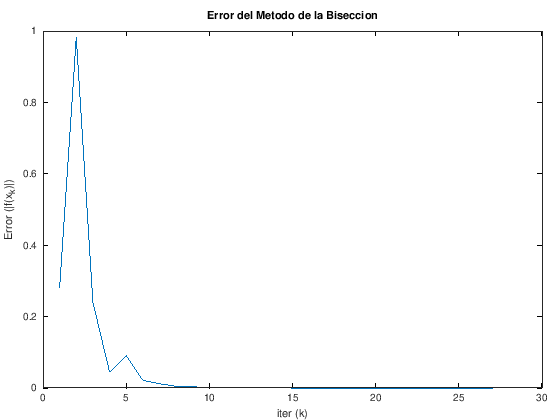

In [127]:
[x, err, iter] = biseccion('@(x)exp(x)-x-2',0,2,10^-8)

### Método de Newton-Raphson

In [4]:
function [xn, k, error] = newton_raphson(f, xo, tol, iterMax)
    syms x;
    % forma 1 %
    %f1 = str2func(f);
    %df = diff(sym(f1))

    % forma 2 %
    f1 = matlabFunction(sym(f)); 
    df = matlabFunction(diff(sym(f1)));
    k = 0;
    error = tol + 1;
    e = [];
    while (tol < error && k < iterMax)
        deno = df(xo);
        if (deno == 0)
            x = [];
            k = []; 
            error = [];
            disp('La función se indefine.')
            break;
        else
            xn = xo - (f1(xo)/deno);
            error = abs(xo - (f1(xo)/deno));
            e = [e error];
            xo = xn;
            ++k;
        end
    end
    plot(1:k, e)
    xlabel('iter (k)')
    ylabel('Error (|f(x_k)|)')
    title('Error del Metodo de la Newton-Raphson')
end

% forma 1 %
% [x,k,error] = newton_raphson('@(x)cos(2*x).^2-x.^2',3/4,10^-8,10)

% forma 2 %
% [x,k,error] = newton_raphson(cos(2*x).^2-x.^2,3/4,10^-8,10)

x =  0.51493
k =  10
error =  0.51493


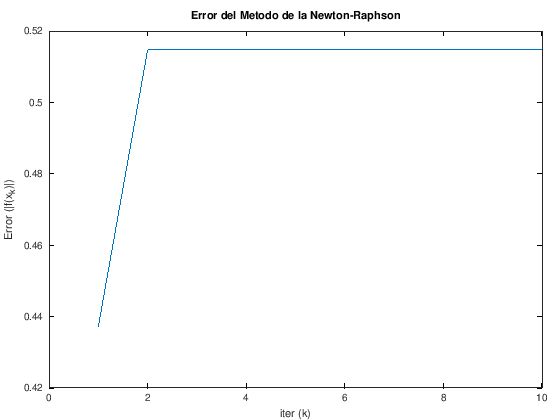

In [5]:
[x, k, error] = newton_raphson(cos(2*x).^2-x.^2,3/4,10^-8,10)

### Método de la Secante

In [9]:
function [xn, k, error] = secante(f, xo, xi, tol, iterMax)    
    syms x;
    f1 = matlabFunction(sym(f));
    k = 0;
    error = tol + 1 ;
    e = [];
    while (tol < error && k < iterMax)
        num = (xi - xo);
        deno = (f1(xi) - f1(xo));
        if (deno == 0)
            x = [];
            k = [];
            e = [];
            disp('La función se indefine.')
            break;
        else
            xn = xi - ((num./deno)* f1(xi));
            error = abs(xn);
            e = [e error];
            xo = xi;
            xi = xn;
            ++k;
        end
    end
    plot(1:k, e)
    xlabel('iter (k)')
    ylabel('Error (|f(x_k)|)')
    title('Error del Metodo de la Secante')
end

% [x,k,error] = secante(exp(-(x.^2))-x,0,1,10^-8,3)

x =  0.65292
k =  3
error =  0.65292


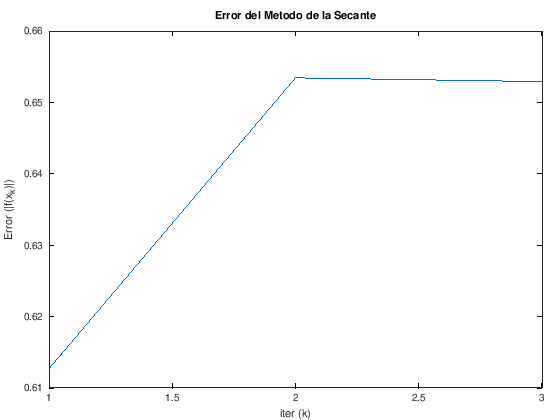

In [10]:
[x, k, error] = secante(exp(-(x.^2))-x,0,1,10^-8,3)

### Método Falsa Posición 

In [44]:
function [x, k, error] = falsa_posicion(f, a, b, tol, iterMax)
  func = matlabFunction(sym(f));
  if (func(a) * func(b) < 0)
    k = 0;
    error = tol + 1;
    e = [];
    while (tol < error && k < iterMax)
      x = b - (((b - a ) / (func(b) - func(a))) * func(b));
      error = abs(func(x));
      e = [e error];
      if (func(a) * func(x) < 0)
        b = x;
      else
        a = x;
      end
      ++k;
    end
    plot(1:k, e)
    xlabel('iter (k)')
    ylabel('Error (|f(x_k)|)')
    title('Error del Metodo de la Falsa Posicion')
  else
    display('No cumple la condición del Teorema de Bolzano.')
  end
end

% [x, k, error] = falsa_posicion(cos(x)-x,1/2,pi/4,10^-8,40) 

x =  0.73909
k =  4
error =  0.0000000044996


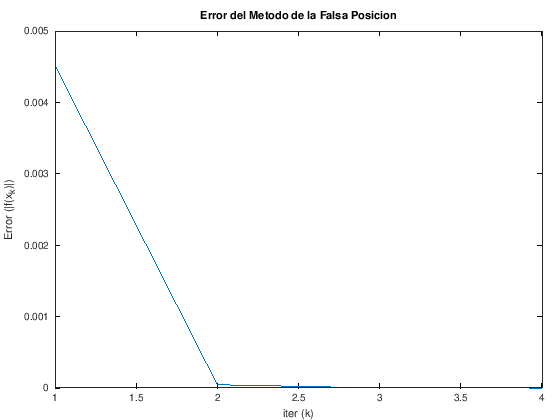

In [45]:
[x, k, error] = falsa_posicion(cos(x)-x,1/2,pi/4,10^-8,40)

### Método del Punto Fijo

In [25]:
function [xk, k, error] = punto_fijo(f, a, b, x0, tol, iterMax)
    f1 = matlabFunction(sym(f)); 
    k = 0;
    error = tol + 1;
    e = [];
    while (tol < error && k < iterMax)
        xk= f1(x0);
        error = abs(f1(xk) - xk);
        e = [e error];
        x0 = xk;
        ++k; 
    end
    plot(1:k, e)
    xlabel('iter (k)')
    ylabel('Error (|f(x_k)|)')
    title('Error del Metodo del Punto Fijo')
end

% [x, k, error]= punto_fijo(log(2*x+1),0.5,1,2,10^-8,5)

xk =  1.2872
k =  5
error =  0.013414


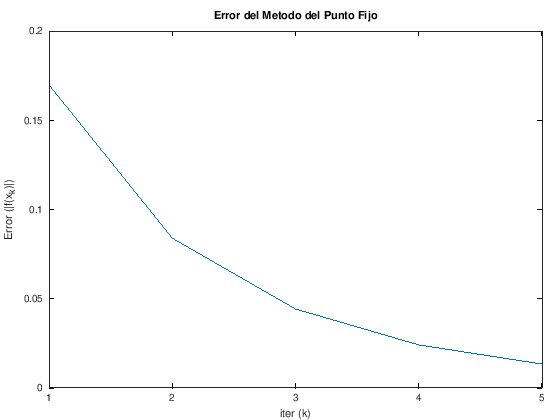

In [26]:
[xk, k, error]= punto_fijo(log(2*x+1),0.5,1,2,10^-8,5)

### Método de Müller

In [37]:
function [r, k, error] = muller(f, x0, x1, x2, tol, iterMax)
    f1 = matlabFunction(sym(f));  
    k = 0;
    error = tol + 1;
    e = [];
    while (tol < error && k < iterMax)
        a = (((x1-x2) * (f1(x0) - f1(x2))) - ((x0 - x2) * (f1(x1) - f1(x2)))) / ((x0 - x1) * (x0 - x2) * (x1 - x2));
        b = ((((x0 - x2).^2) * (f1(x1) - f1(x2))) - (((x1 - x2).^2) * (f1(x0) - f1(x2)))) / ((x0 - x1) * (x0 - x2) * (x1 - x2));
        c = f1(x2);
        dis = sqrt((b.^2) - 4 * a * c);
        if (b < 0)
            r = x2 - ((2 * c)/( b - dis));
        else
            r = x2 - ((2 * c)/(b + dis));
        end
        error = abs(f1(r));
        e = [e error];
        d1 = abs(x0 - r);
        d2 = abs(x1 - r);
        d3 = abs(x2 - r);
        if(max([d1 d2 d3]) == d1)
            [s] = sort([r x1 x2]);
            x0 = s(1);
            x1 = s(2);
            x2 = s(3);
        elseif(max([d1 d2 d3]) == d2)
            [s] = sort([r x0 x2]);
            x0 = s(1);
            x1 = s(2);
            x2 = s(3);
        else
            [s] = sort([r x0 x1]);
            x0 = s(1);
            x1 = s(2);
            x2 = s(3);
        end
        ++k;
    end
    plot(1:k, e)
    xlabel('iter (k)')
    ylabel('Error (|f(x_k)|)')
    title('Error del Metodo de Muller')
end

% [r, k ,error] = muller(sin(x)-x/2,2,2.2,1.8,10^-8,3)

r =  1.8955
k =  3
error =    1.8041e-13


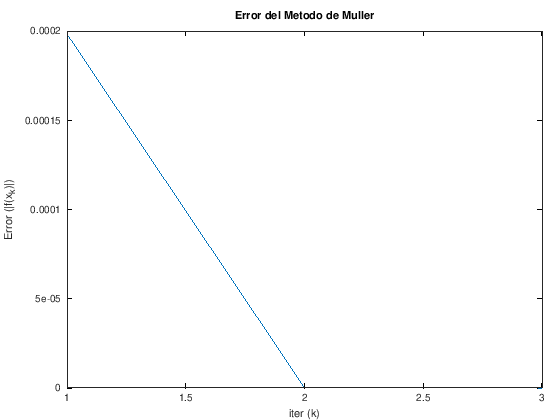

In [39]:
[r, k ,error] = muller(sin(x)-x/2,2,2.2,1.8,10^-8,3)

# Fin